# Finite target yield curve
### (Reaction yield vs beam energy for a narrow resonance)




#### <u>**Reaction yield definition** </u>
$$
Y = \frac{number~of~reactions}{number~of~incident~beam~particles} = \frac{N_R}{N_B}.
$$

Reaction cross-section:
$$
\sigma = \frac{N_R/t}{N_T \times N_B/(t \times A)},\\
$$
where, $N_R, N_B, N_T$ are number of reactions, beam, and target nuclei respectively, *t* is time, and *A* is the beam area.

Combining the above 2 equations gives,
$$
Y = \sigma \times (N_T/A).
$$

#### <u>**Thick target yield** </u>

The reaction yield for a thin slice (of thickness $\Delta x$) of target:
$$
\Delta Y = \sigma \times N_t \times \Delta x,\\
$$
where, $N_t$ is number of target atoms per unit area.

Reaction yield for the full target thickness for incident beam energy $E_0$:
$$
Y(E_0) = \int \sigma(x) N(x) dx = \int \sigma(x) N(x) dx \frac{dE(x)}{dx} \frac{dx}{dE(x)} = \int_{E_0-\Delta E}^{E_0} \frac{\sigma(E)}{\epsilon(E)} dE,
$$
where, $\Delta E$ is the total energy loss in the full target thickness,\
and $\epsilon(E)$ is the stopping power in $eV/(at/cm^2)$:
$$
\epsilon(E)=\frac{1}{N} \frac{dE}{dx}.
$$

Using Breit-Wigner equation for resonant cross-section:
$$
\sigma_{BW}(E) = \frac{\lambda^2}{4\pi} \frac{(2J+1)(1+\delta_{01})}{(2J_0+1)(2J_1+1)} \frac{\Gamma_a\Gamma_b}{(E_r-E)^2+\Gamma^2/4},
$$
where,\
$J_0, J_1, \& ~J$ are the target, projectile, and resonance spins,\
$\Gamma_a, \Gamma_b, \& ~\Gamma$ are the entrace channel, exit channel, and the resonoance widths.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

def lambda_sq(tar_A, proj_A, Er_com):
    red_M = proj_A * tar_A / (proj_A + tar_A)
    h = 4.1357E-21  # MeV.s
    amu = 9.32E+02  # MeV/c2
    c = 3E+10  # cm/s
    return h * h * c * c / (2 * red_M * amu * Er_com)  # cm2

def max_yield(lambda_sq_com, dedx_com, wg_com):
    Ymax = (lambda_sq_com / 2) * (1 / dedx_com) * (wg_com)
    return Ymax

def integrand(E_com, Er_com, gamma_r_com, delE_com, Ein_com, delta_com):
    lim1 = math.atan((E_com - Er_com) / (gamma_r_com / 2))
    lim2 = math.atan((E_com - Er_com - delE_com) / (gamma_r_com / 2))
    Y = (lim1 - lim2) / 3.14159 * np.exp(-0.5 * ((E_com - Ein_com) / delta_com) ** 2) / (
                delta_com * (2 * 3.14159) ** 0.5)
    return Y

def finite_target_yield(Ein_com, Ymax, Er_com, gamma_r_com, delE_com, delta_com):
    return (Ymax) * integrate.quad(lambda E_com: integrand(E_com, Er_com, gamma_r_com, delE_com, Ein_com, delta_com),
                                   Ein_com - 3 * delta_com, Ein_com + 3 * delta_com)[0]

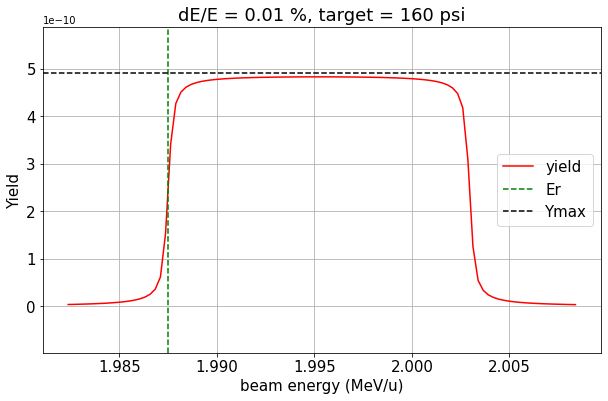

In [2]:
proj_A = 16  # Mass number
tar_A = 4  # Mass number
E_ex_lab = 11.09  # MeV
Q = 4.73  # MeV
wg_com = 30E-6  # MeV
gamma_r_com = 1000e-6  # 1keV upper limit from Fitfield
dedx_lab = 6.20E-20  # MeV/atom/cm2
tar_den_psi = 160 # psi
beam_E_delta = 0.005  # %

Er_com = E_ex_lab - Q
E_proj_lab = Er_com * (proj_A + tar_A) / tar_A
tar_den = (3.74 * tar_den_psi / 150) * 1E18  # atoms/cm2
dedx_com = (tar_A / (tar_A + proj_A)) * dedx_lab
delE_com = dedx_com * tar_den  # MeV
beam_E_delta_com = beam_E_delta * 0.01 * Er_com

mid_E_com = Er_com + 0.5*(gamma_r_com + delE_com)
mid_E_lab = mid_E_com * (proj_A + tar_A) / tar_A

lambda_sq_com = lambda_sq(tar_A, proj_A, Er_com)
Ymax = max_yield(lambda_sq_com, dedx_com, wg_com)

x = np.linspace(mid_E_lab / proj_A - 0.013, mid_E_lab / proj_A + 0.013, 100)
th_yield = []

for i in range(0, len(x)):
    Ein_lab = x[i] * proj_A
    Ein_com = Ein_lab * tar_A / (proj_A + tar_A)

    Y = finite_target_yield(Ein_com, Ymax, Er_com, gamma_r_com, delE_com, beam_E_delta_com)
    th_yield.append(Y)

plt.figure(figsize=(10, 6))

plt.plot(x, th_yield, linestyle='-', c='r', alpha=1.0, label='yield')

plt.axvline(E_proj_lab/proj_A, linestyle='--', c='g', label='Er')
plt.axhline(Ymax, c='k', linestyle='--', label='Ymax')

fontSize=15

plt.xlabel('beam energy (MeV/u)',fontsize=fontSize)
plt.xticks(fontsize=fontSize)
plt.ylabel('Yield',fontsize=fontSize)
plt.yticks(fontsize=fontSize)
plt_title = 'dE/E = {:.2f} %, target = {:.0f} psi'.format(beam_E_delta, tar_den_psi)
plt.title(plt_title,fontsize=18)
plt.ylim(-Ymax*0.2, 1.2*Ymax)
plt.legend(fontsize=15)
plt.grid()

plt.show()